<a href="https://colab.research.google.com/github/LucasGleysson/Estatistica_DS_ML/blob/master/Classificacao_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classificação

É um tipo de classe de algoritmo de Machine Learning, que utiliza base históricas para aprender o comportamento dos dados, traçar linhas que dividem os dados e assim conseguir classificalos e rotulalos.

#Naive Bayes
Algoritmo de classificação com base em probabilidade que utiliza uma "Tabela de Probabilidade" para saber qual a maior chance de um registro se encaixar numa determinada categoria. Quando entra um novo registro, ele irá calcular a combinação das caracteristica em cada uma das classificações.


O importante para o Naive Bayes é que as variáveis sejam categóricas.

#Classificação com dados Desbalanceados.

##Importação e visualização

In [38]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [39]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/credit_data.csv')
data

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


##Tratamento

In [40]:
data.columns = ['IdCliente','renda','idade','emprestimo','pago']

data['idade'].fillna(data['idade'].median(), inplace=True)
data['idade'] = data['idade'].astype(int)
data['idade'].replace([-28,-52,-36], [28,52,36], inplace=True)
data['pago'].replace([0,1], [1,0], inplace=True)
data.head()

,IdCliente,renda,idade,emprestimo,pago
0,1,66155.925095,59,8106.532131,1
1,2,34415.153966,48,6564.745018,1
2,3,57317.170063,63,8020.953296,1
3,4,42709.534201,45,6103.642260,1
4,5,66952.688845,18,8770.099235,0


##Análise

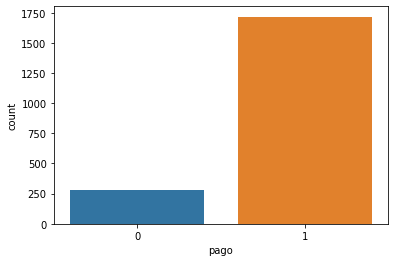

In [41]:
sns.countplot(x=data['pago']);

- Uma base de dados desbalanceada pode fazer o algoritmo aprender a lidar com a situação de uma forma errada, que não representa a realidade. Nesse caso, como a maioria dos clientes são pagantes, ele pode aprender que quase todos os clientes futuros irão pagar, liberando assim o crédito de uma maneira muito fácil e podendo dar prejuizo ao banco.

## Divisão da base

É necessário fazer uma divisão dos dados para o treinamento do algoritmo, criando duas bases de dados, uma com as variáveis que influenciam no resultado (Variáveis independentes) e outra apenas com as respostas (Variáveis dependentes).

In [42]:
copy = data.copy()
x = copy.drop(columns = ['IdCliente','pago'])
y = copy['pago']
x.shape, y.shape

((2000, 3), (2000,))

De pois de dividir as duas bases de dados, agora fazemos mais uma divisão entre os dados de treino e os dados de teste.

In [43]:
x_train,x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, stratify=y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1600, 3), (400, 3), (1600,), (400,))

##Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [45]:
# Criação e treinamento do modelo
modelo =  GaussianNB()
modelo.fit(x_train, y_train)

# Previsões
previsoes = modelo.predict(x_test)

# Teste de acurácia para ver como o modelo se saiu
display(accuracy_score(y_test, previsoes))

0.91

- A Acurácia é a média global do acerto do modelo ao classificar as classes, pode ser calculada através da razão (VN+VP)/(VP+FN+VN+FP).

- A acuracia não é a melhor métrica para avaliar um modelo quando os dados estão desbalanceados.

<AxesSubplot:>

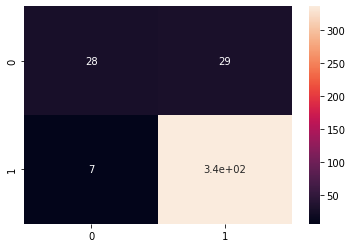

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, previsoes)
sns.heatmap(cm,annot=True)

- A matrix de confusão nos ajuda a visualizar melhor os acertos e erros do modelo. 

In [61]:
# Essa é a ordem na classificação binária da confusion_matrix
vn = cm[0][0]
fn = cm[1][0]
vp = cm[1][1]
fp = cm[0][1]
print(cm)
print(f"VP = {vp}")
print(f"FP = {fp}")
print(f"VN = {vn}")
print(f"FN = {fn}")

[[ 28  29]
 [  7 336]]
VP = 336
FP = 29
VN = 28
FN = 7


In [62]:
# Formula da média global de acertos (Acuracy)
(vp + vn) / (vp + fp + vn + fn)

0.91

In [63]:
# Percentual de pessoas que pagaram o emprestimo
round((vp) / (vp + fp), 2)

0.92

In [64]:
# Percentual de pessoas que não pagaram o emprestimo
round((vn) / (vn + fn), 2)

0.8

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.49      0.61        57
           1       0.92      0.98      0.95       343

    accuracy                           0.91       400
   macro avg       0.86      0.74      0.78       400
weighted avg       0.90      0.91      0.90       400



Aqui, podemos ver algumas outras métricas do modelo para avaliar seu desempenho.

- Precision: É intuitivamente a capacidade do classificador de não rotular como positiva uma amostra que é negativa: VP / (VP + FP)
 - Valor preditivo positivo: VP/(VP+FP)
 - Valor preditivo negativo: VN/(VN+FN)

---

- Recall: É intuitivamente a capacidade do classificador de encontrar todas as amostras positivas: VP / (VP + FN)
 - Sensibilidade: VP/(VP+FN)
 - Especificidade: VN/(VN+FP)

---
 - F1-Score: É a média harmônica entre o Recall e Precision, ou seja, ela resume as informações dessas duas métricas.

## Aplicação de Caso

Vamos supor que existem uma lista de 1000 clientes que não irão pagar o emprestimo, cada emprestimo não pago gera um prejuizo de $5000. Usando o modelo atual nos 1000 clientes, ele teria uma taxa de acerto de 80%.

Ou seja, de 1000 pessoas, 200 receberiam o crédito, gerando assim um prejuizo de $100,000.

O objetivo então é otimizar a porcentagem de acertos das predições, para assim evitar prejuizos.